In [161]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris,load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn import set_config
set_config(display="diagram")

# Step 1: Introduction

Welcome to the dataset inspection!

Let's get started!

# Step 2: Data Preparation

In [162]:
# Load the dataset

loaded_data = pd.read_csv('breastcancer.csv')
data = loaded_data.drop(columns=['Y'])
target = loaded_data['Y']
numeric_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(include='object').columns

transformer = make_column_transformer(((OneHotEncoder(sparse=False)), categorical_cols),remainder='passthrough')
# transforming
data_array = transformer.fit_transform(data)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(data_array, target, test_size=0.2, random_state=42)

# Step 3: Data Exploration

Let's explore the dataset to understand its structure and features.

In [163]:
# Display the number of datapoints (row in a dataframe)
print(data.shape)

# Class distribution for a classification problem

# Calculate unique values and their count
unique_values, counts = np.unique(target, return_counts=True)
class_distribution = dict(zip(unique_values, counts))
print("Class distribution:")
print(class_distribution)

# Display the first few rows of the dataset
print(data.head())

# Get basic statistics of the dataset
print("\nBasic statistics of the dataset:")
print(data.describe())

# Display dataset information
print(data.info())


(569, 30)
Class distribution:
{'B': 357, 'M': 212}
      x1     x2      x3      x4       x5       x6        x7       x8      x9  \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760    0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864    0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990    0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390    0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  198.0000  0.10430  0.1809   

       x10  ...    x21    x22     x23     x24     x25       x26     x27  \
0  0.07871  ...  25.38  17.33  184.60  2019.0  0.1622    0.6656  0.7119   
1  0.05667  ...  24.99  23.41  158.80  1956.0  0.1238    0.1866  0.2416   
2  0.05999  ...  23.57  25.53  152.50  1709.0  0.1444    0.4245  0.4504   
3  0.09744  ...  14.91  26.50   98.87   567.7  0.2098    0.8663  0.6869   
4  0.05883  ...  22.54  16.67  152.20  1575.0  0.1374  205.0000  0.4000   

        x28      

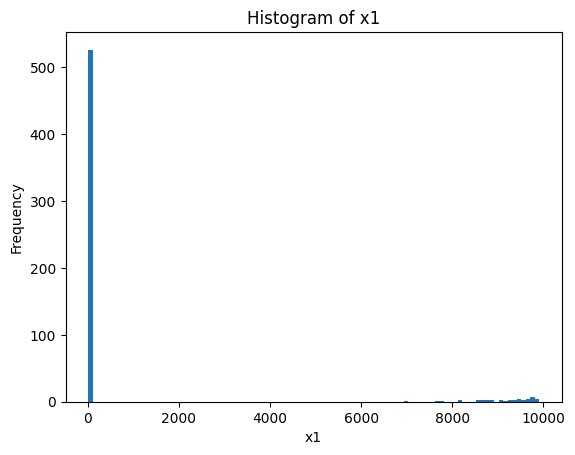

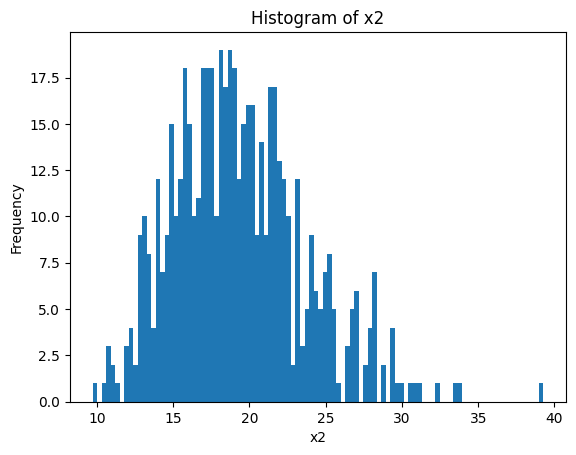

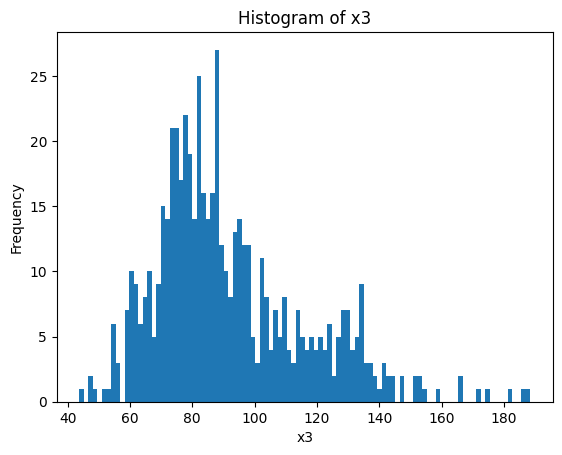

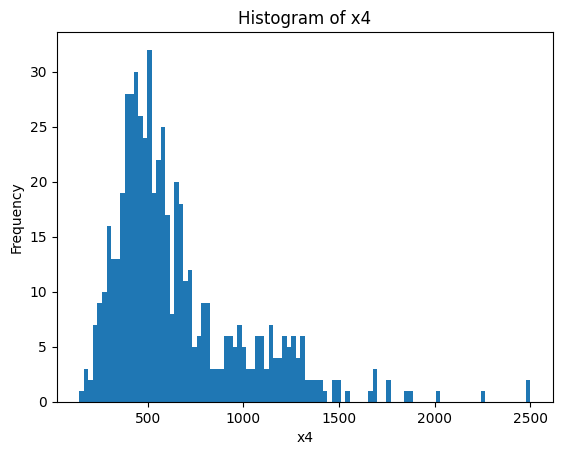

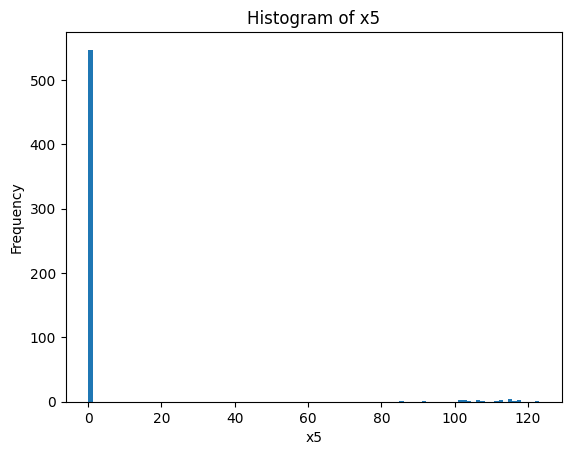

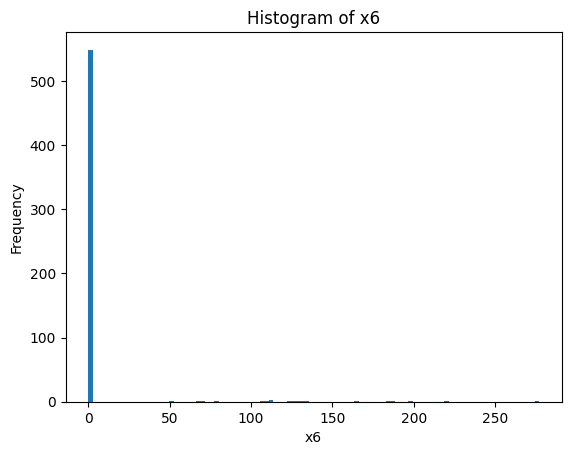

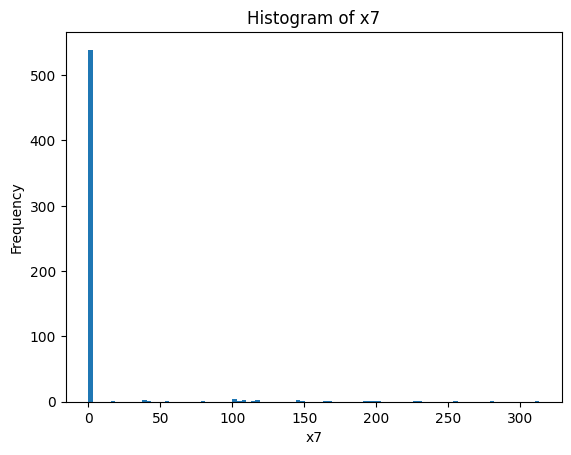

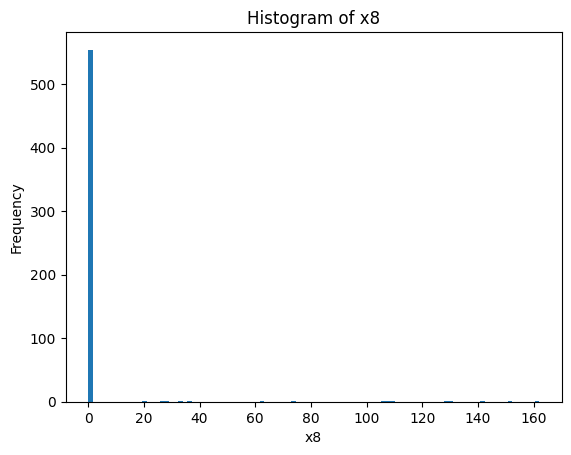

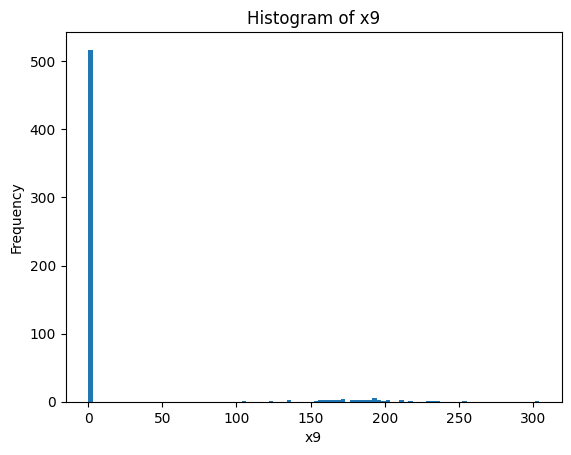

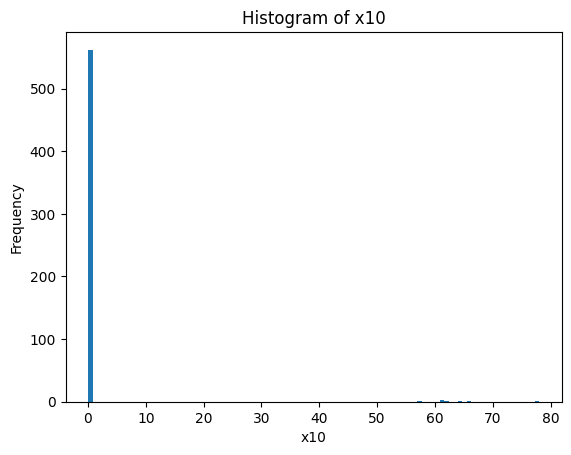

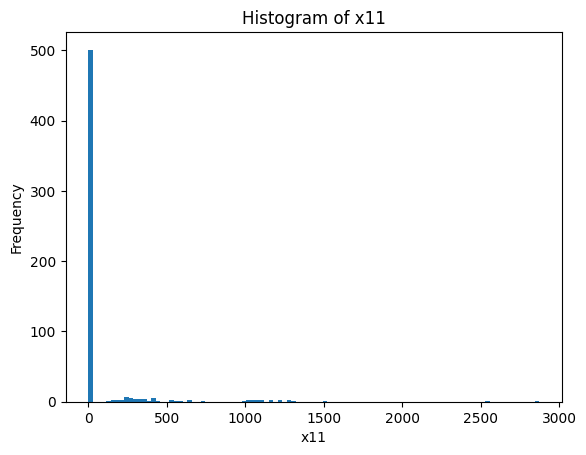

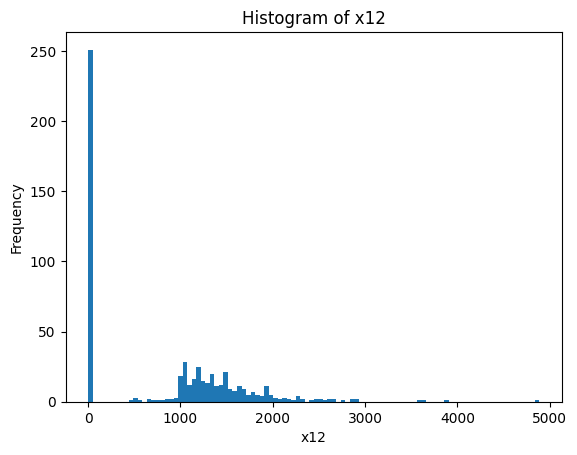

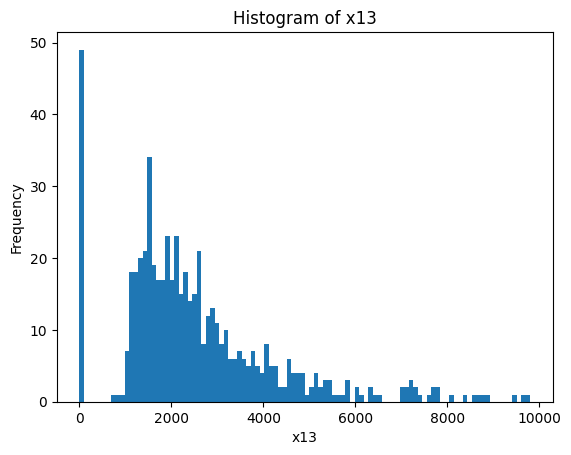

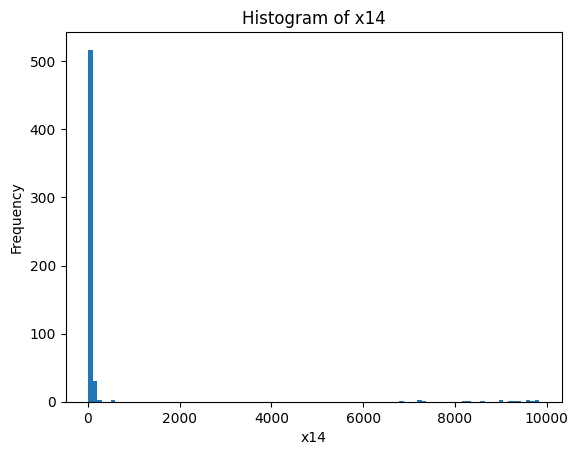

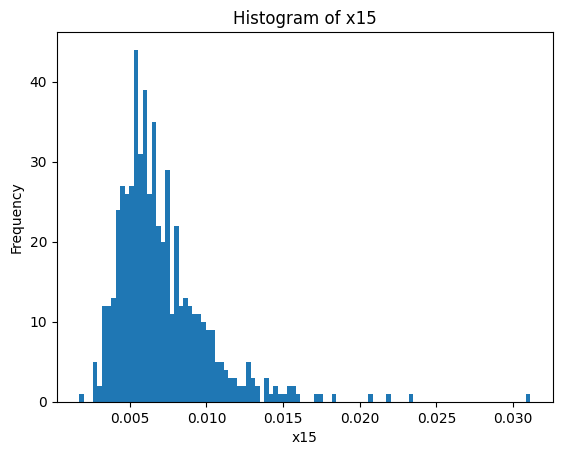

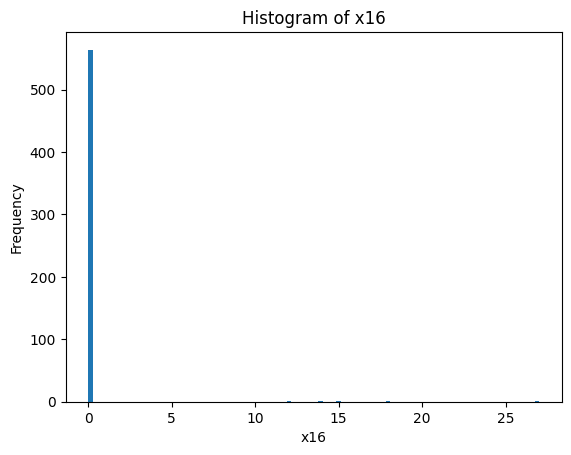

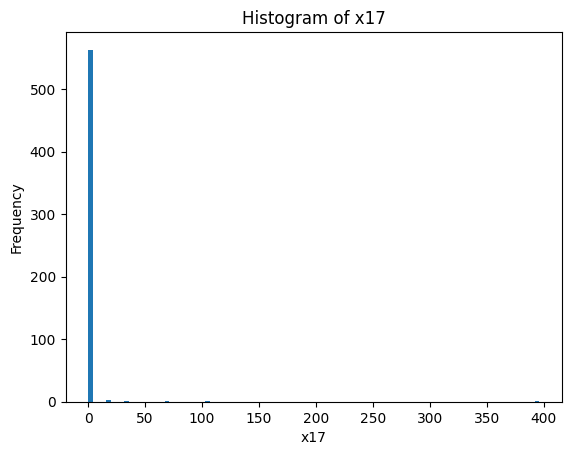

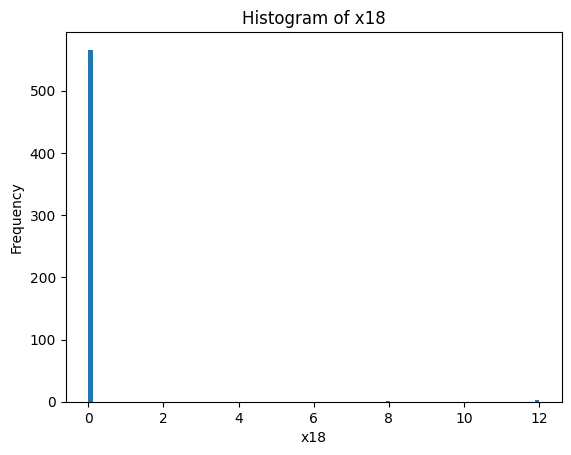

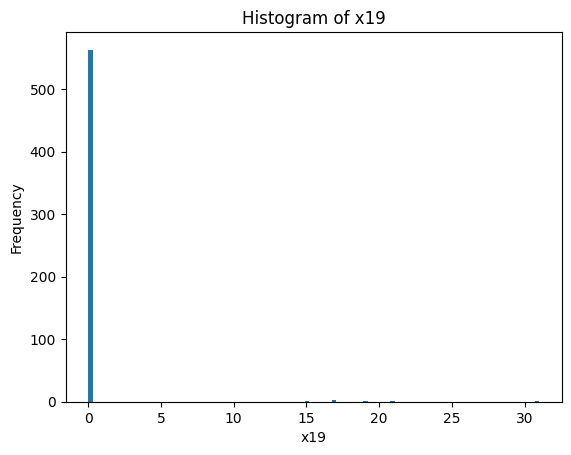

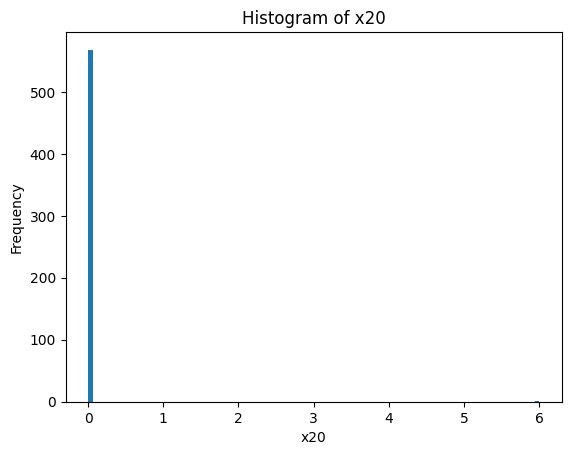

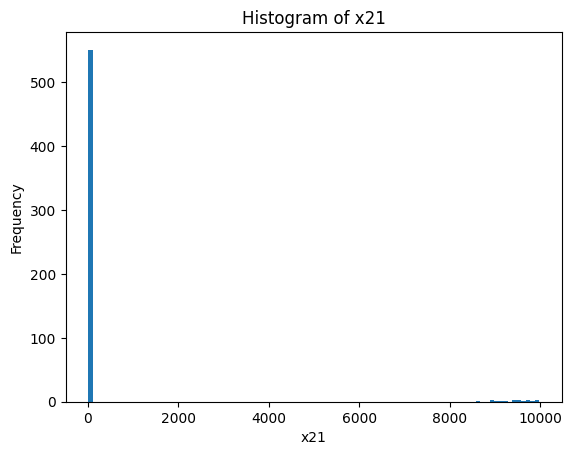

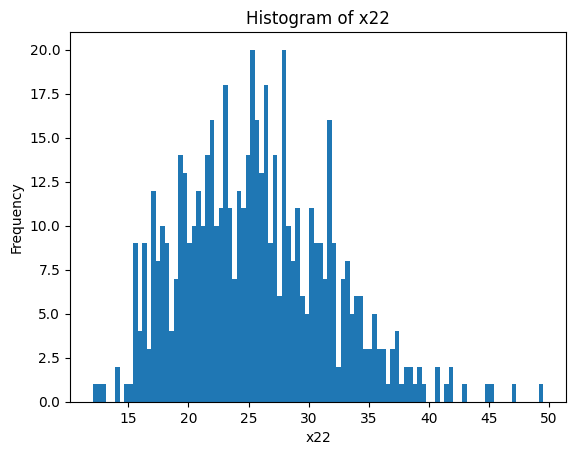

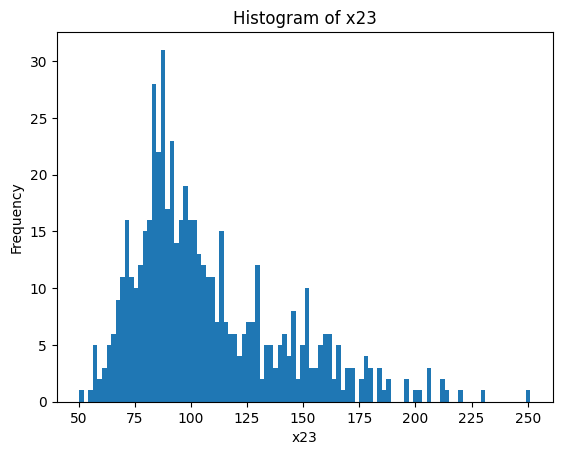

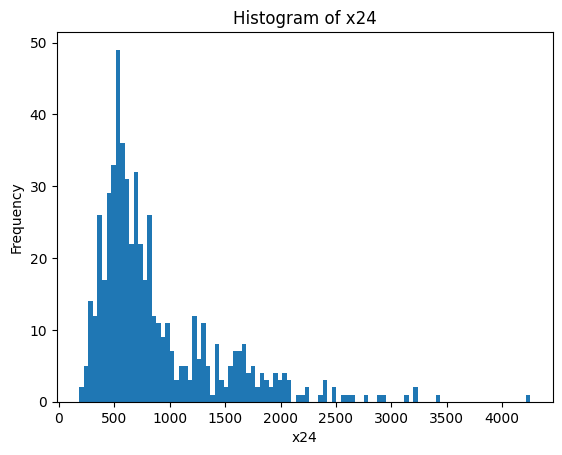

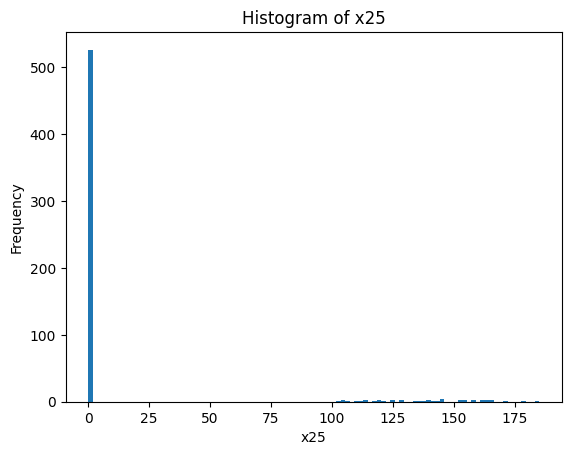

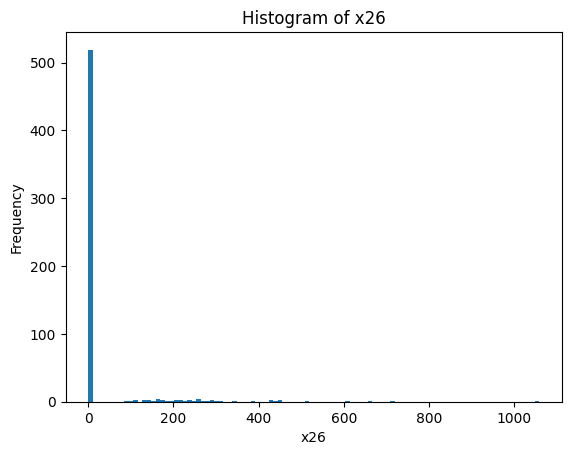

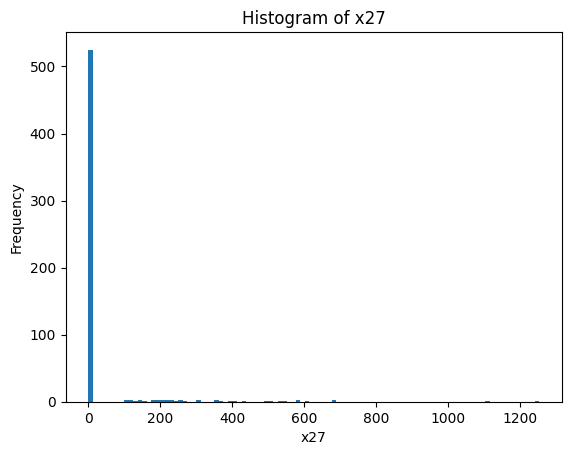

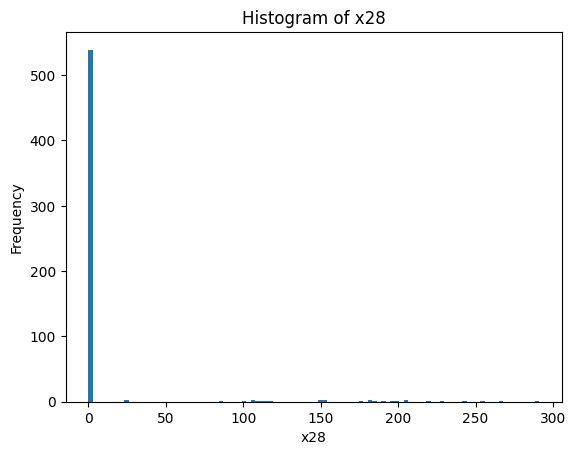

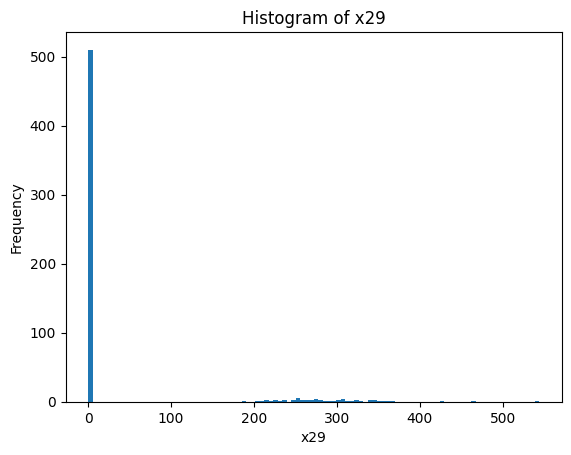

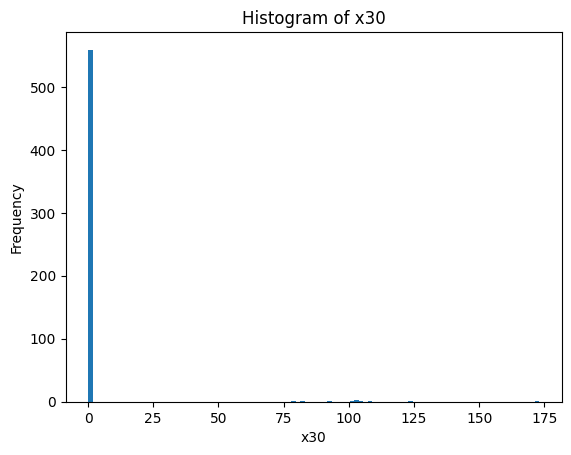

In [164]:
# Create a histogram for numeric columns only
for col in numeric_cols:
    data[col].plot.hist(bins=100)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

In [ ]:
# Inspect the distribution of the feature

import scipy
feature = None
#feature = data["x1"]
if feature is not None:
    kurtosis = scipy.stats.kurtosis(feature)
    skew = scipy.stats.skew(feature)
    median = np.median(feature)
    print(f"Kurtosis: {kurtosis}")
    print(f"Skew: {skew}")
    print(f"Median: {median}")
    scipy.stats.normaltest(feature)

# Step 4: Data Preprocessing

Now, let's preprocess the data. 

We'll handle missing values (if any), 

encode categorical features (if any),

and scale numeric features.


In [ ]:
# Check missing values and handle them (if any)
## FYI: some algorithms do not handle the data having missing values except Tree-based models.

data.isna().sum()
# Scale numeric features using StandardScaler
## FYI: some of the Machine learning algorithm require and benefit from the data to be in a specific range such as Neural networks, SVMs, K-means clustering, PCA, and Logistic regression.
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Model creation

We'll now create and train different classification models using scikit-learn.

In [167]:
# Create and train a Logistic Regression classifier
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [168]:
# Create and train a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [169]:
# Create and train a Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [170]:

# Create and train a Support Vector Machine (SVM) classifier
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

# Step 6: Model Evaluation

Let's evaluate the models on the testing data using various evaluation metrics.

In [171]:
#Evaluate the Logistic Regression classifier
y_pred_lr = logistic_regression.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
print("Logistic Regression:")
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1 Score: {f1_lr}")

Logistic Regression:
Accuracy: 0.956140350877193
Precision: 0.9560881370091896
Recall: 0.956140350877193
F1 Score: 0.9560357083576897


In [172]:
# Evaluate the Decision Tree model
y_pred_dt = decision_tree.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print("Decision Tree Model:")
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1 Score: {f1_dt}")


Decision Tree Model:
Accuracy: 0.956140350877193
Precision: 0.9569049312470365
Recall: 0.956140350877193
F1 Score: 0.9558014271241044


In [173]:
# Evaluate the Random Forest model
y_pred_rf = random_forest.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("\nRandom Forest Model:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")


Random Forest Model:
Accuracy: 0.9649122807017544
Precision: 0.9652053622194477
Recall: 0.9649122807017544
F1 Score: 0.9647382344750767


In [174]:
# Evaluate the Support Vector Machine (SVM) model
y_pred_svm = svm.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print("\nSupport Vector Machine (SVM) Model:")
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1 Score: {f1_svm}")


Support Vector Machine (SVM) Model:
Accuracy: 0.9649122807017544
Precision: 0.9649122807017544
Recall: 0.9649122807017544
F1 Score: 0.9649122807017544
